# Model comparison with World Ocean Atlas Observations and Seawifs and Modis satelite data

In [2]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import numpy as np
from matplotlib.pyplot import figure
import matplotlib as mpl
import pylab 
from cartopy.util import add_cyclic_point
import operator

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

import scipy.io as sio
import pandas as pd
import matplotlib.cm as cm

## import observations 

In [3]:
# observations 
obs = sio.loadmat('mat_files/WOA_SST&Nutrients.mat')
po4_surf_obs = obs['po4_surf_obs']
no3_surf_obs = obs['no3_surf_obs']          
temp_surf_obs = obs['temp_surf_obs']
po4_surf_avg_obs= obs['po4_surf_avg_obs']
no3_surf_avg_obs = obs['no3_surf_avg_obs']
temp_surf_avg_obs = obs['temp_surf_avg_obs']   
no3_obs = obs['no3_obs']
po4_obs = obs['po4_obs']
temp_obs = obs['temp_obs']

# model
model = sio.loadmat('mat_files/model_SST&nutrients.mat')
temp_surf_avg_model = model['temp_surf_avg_model'] 
no3_surf_avg_model = model['no3_surf_avg_model']
po4_surf_avg_model = model['po4_surf_avg_model']

# regular model for lats and lons. 
ds = xr.open_dataset('/glade/work/gabyn/MARBL_spectra/remapgrid.out1.nc')

FileNotFoundError: [Errno 2] No such file or directory: 'mat_files/WOA_SST&Nutrients.mat'

In [4]:
ds.lat

NameError: name 'ds' is not defined

## SST comparison 

## Difference between surface temperature in the model and WOA
there are negative values for $NO_3$ and $PO_4$ that I will make into zeros, to correct for those slight errors in the model. 
* min $PO_4$ = -0.00042336076
* min $NO_3$ = -0.0047238637

In [3]:
no3_surf_avg_obs[no3_surf_avg_obs<0] =0
po4_surf_avg_obs[po4_surf_avg_obs<0] =0
no3_surf_avg_model[no3_surf_avg_model<0]=0
po4_surf_avg_model[po4_surf_avg_model<0]=0

In [4]:
temp_diff = temp_surf_avg_model - temp_surf_avg_obs
no3_diff  = no3_surf_avg_model - no3_surf_avg_obs
po4_diff  = po4_surf_avg_model - po4_surf_avg_obs

temp_diff_norm = temp_diff/temp_surf_avg_obs
no3_diff_norm  = no3_diff/no3_surf_avg_obs
po4_diff_norm  = po4_diff/po4_surf_avg_obs

In [5]:
# Temperature 

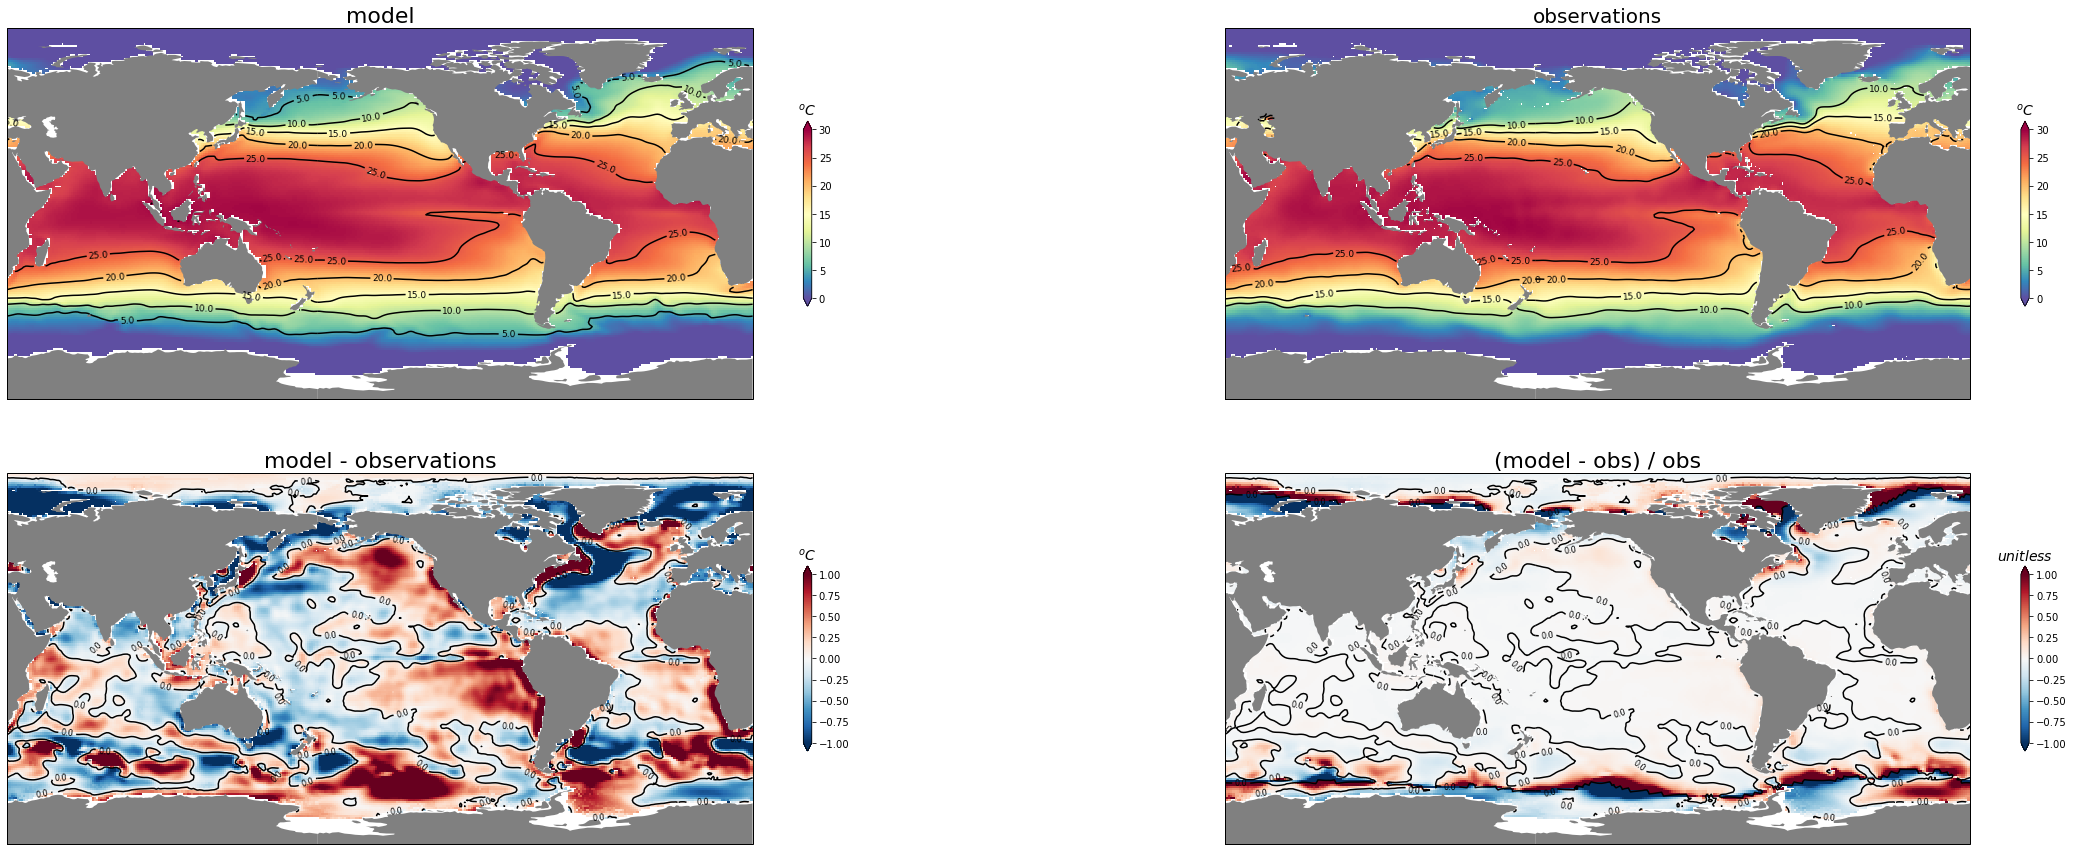

In [7]:
fig = plt.figure(figsize=(40, 15))
lat = ds.lat

# Temperature model
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(temp_surf_avg_model, coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(),vmin = 0, vmax =30)
cs = ax.contour(lon, lat, phyto, levels = [5, 10, 15, 20, 25, 30], colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('model', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# temperature observations 
ax1 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(temp_surf_avg_obs, coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(),vmin = 0, vmax =30)
cs = ax1.contour(lon, lat, phyto, levels = [10, 15, 20, 25],colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('observations', fontsize = 20)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# model - observations  
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(temp_diff, coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
cs = ax2.contour(lon, lat, phyto, levels =[0],colors='k', transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('model - observations', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# model - observations / observations   
ax3 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(temp_diff_norm, coord=ds.lon, axis=1)
cf = ax3.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
cs = ax3.contour(lon, lat, phyto, levles =[0],colors='k', transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax3.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax3.set_title('(model - obs) / obs', fontsize = 22)
cbar = plt.colorbar(cf, shrink =0.5,extend = 'both')
cbar.ax.set_title('$unitless$', fontsize = 14)
fig.savefig('temp_comparison.png', dpi=600, bbox_inches='tight')

## $NO_3$

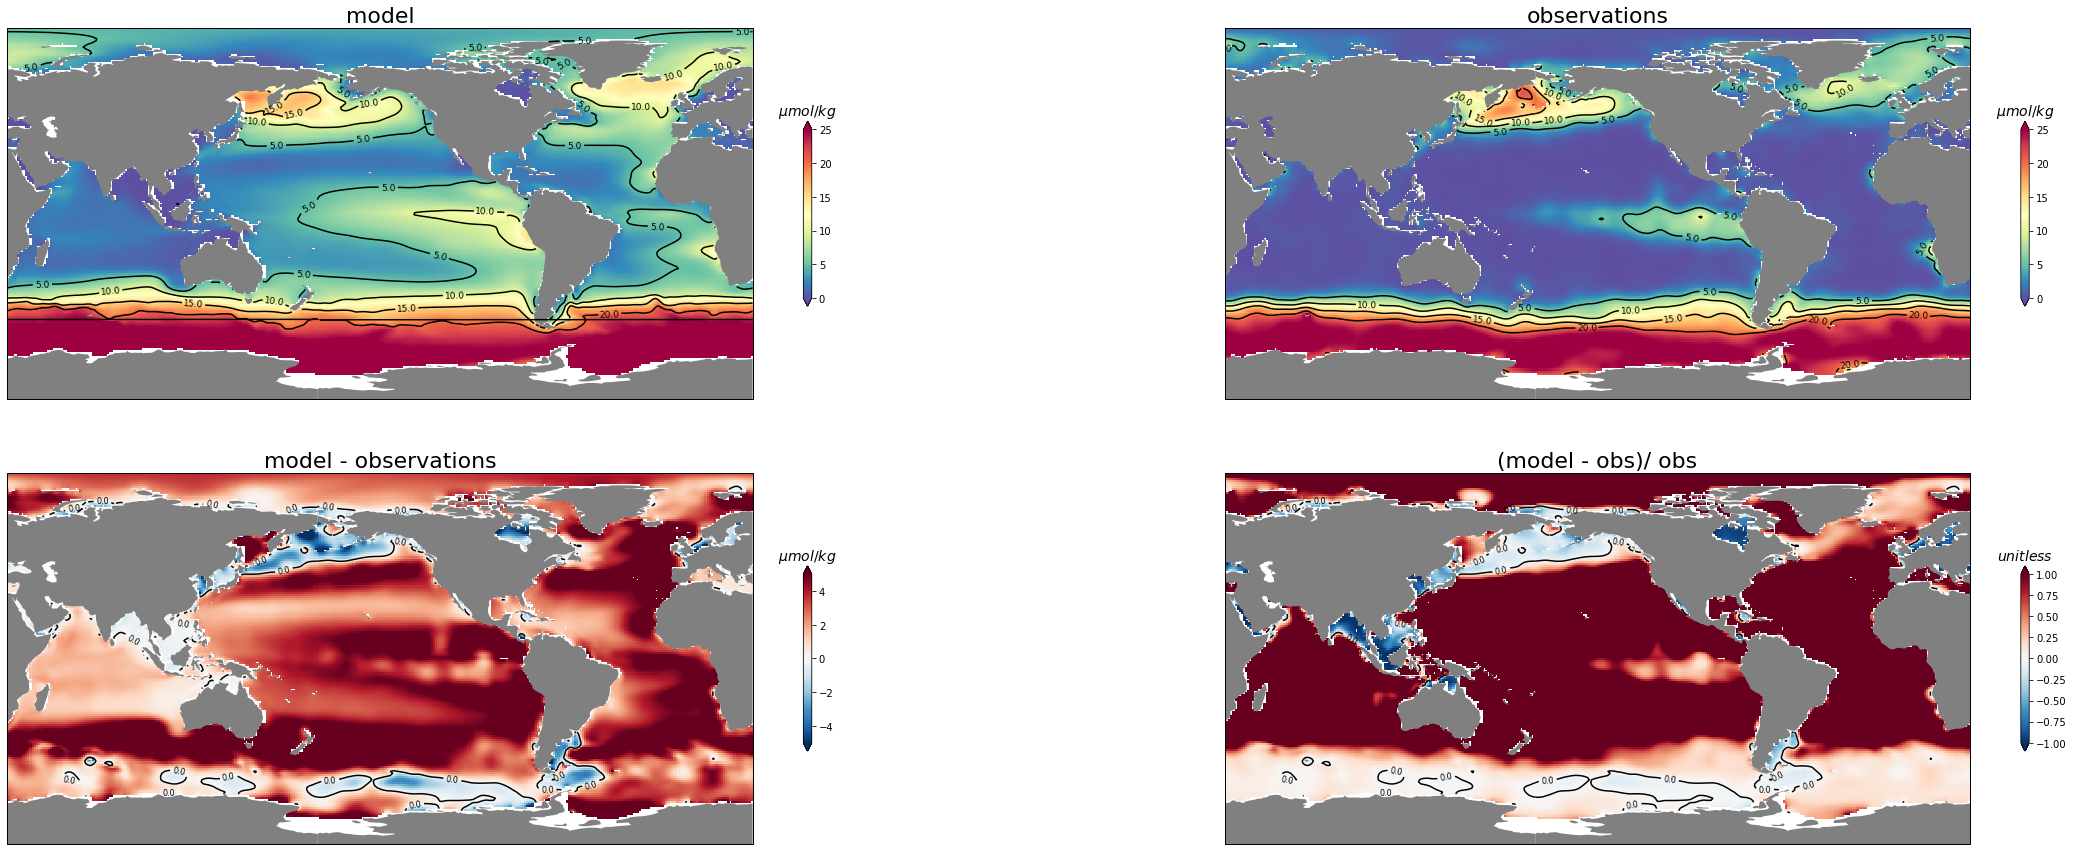

In [7]:
fig = plt.figure(figsize=(40, 15))
lat = ds.lat

# Temperature model
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_surf_avg_model, coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(),vmin = 0, vmax =25)
cs = ax.contour(lon, lat, phyto, levels = [0,5,10,15,20], colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('model', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# temperature observations 
ax1 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_surf_avg_obs, coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(),vmin = 0, vmax =25)
cs = ax1.contour(lon, lat, phyto, levels = [0,5,10,15,20],colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('observations', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations  
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_diff, coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -5, vmax =5)
cs = ax2.contour(lon, lat, phyto,levels =[0], colors='k', transform=ccrs.PlateCarree(), vmin =0, vmax =0)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('model - observations', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations / observations   
ax3 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(no3_diff_norm, coord=ds.lon, axis=1)
cf = ax3.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
cs = ax3.contour(lon, lat, phyto,levels =[0], colors='k', transform=ccrs.PlateCarree(), vmin =0, vmax =0)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax3.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax3.set_title('(model - obs)/ obs', fontsize = 22)
cbar = plt.colorbar(cf, shrink =0.5,extend = 'both')
cbar.ax.set_title('$unitless$', fontsize = 14)
fig.savefig('no3_comparison.png', dpi=600, bbox_inches='tight')

# $PO_4$

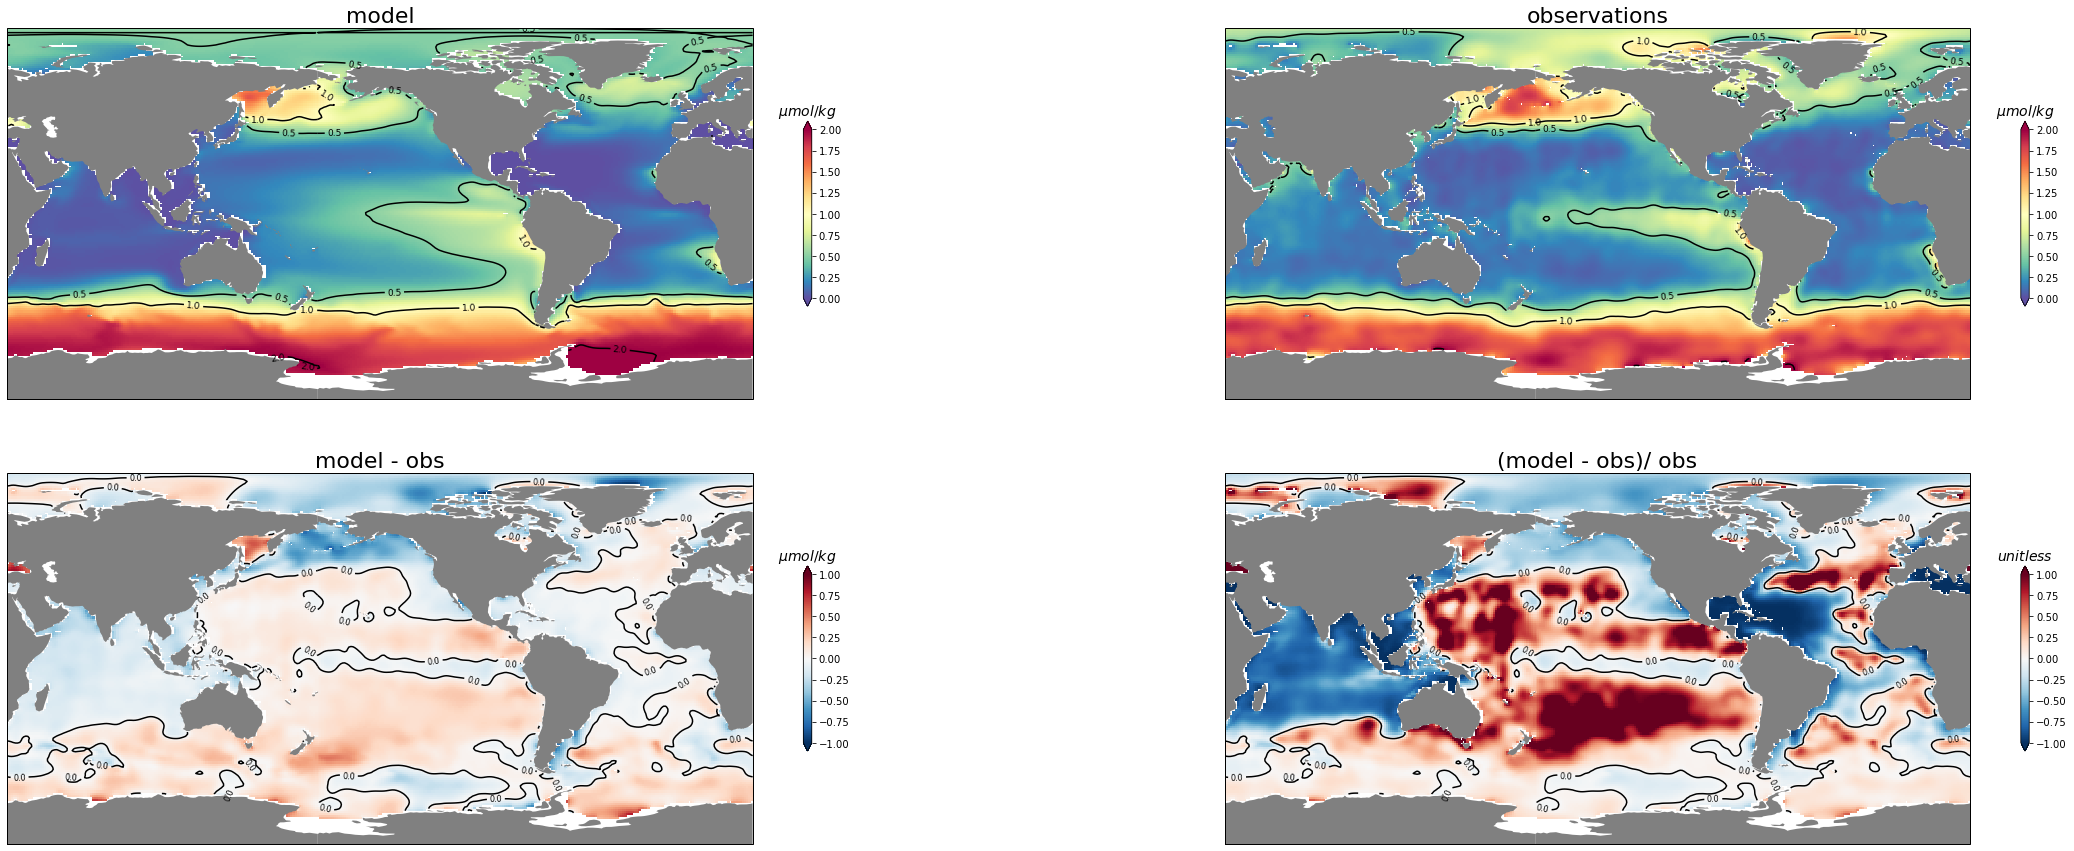

In [9]:
fig = plt.figure(figsize=(40, 15))
lat = ds.lat

# Temperature model
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_surf_avg_model, coord=ds.lon, axis=1)
cf = ax.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(),vmin = 0, vmax =2)
cs = ax.contour(lon, lat, phyto, levels =[0, 0.5, 1, 2],colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax.set_title('model', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# temperature observations 
ax1 = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_surf_avg_obs, coord=ds.lon, axis=1)
cf = ax1.pcolor(lon, lat, phyto, cmap='Spectral_r',transform=ccrs.PlateCarree(),vmin = 0, vmax =2)
cs = ax1.contour(lon, lat, phyto, levels =[0, 0.5, 1, 2],colors='k', transform=ccrs.PlateCarree())
lb = plt.clabel(cs, fontsize=9, inline=True, fmt='%r',inline_spacing=5);
land = ax1.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax1.set_title('observations', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5, extend = 'both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations  
ax2 = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_diff, coord=ds.lon, axis=1)
cf = ax2.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
cs = ax2.contour(lon, lat, phyto, levels =[0],colors='k', transform=ccrs.PlateCarree(),vmin = 0, vmax =0)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax2.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax2.set_title('model - obs', fontsize = 22)
cbar = plt.colorbar(cf,shrink =0.5,extend = 'both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations / observations   
ax3 = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree(central_longitude=210.0))
phyto, lon = add_cyclic_point(po4_diff_norm, coord=ds.lon, axis=1)
cf = ax3.pcolor(lon, lat, phyto, cmap='RdBu_r',transform=ccrs.PlateCarree(),vmin = -1, vmax =1)
cs = ax3.contour(lon, lat, phyto, levels =[0],colors='k', transform=ccrs.PlateCarree(),vmin = 0, vmax =0)
lb = plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
land = ax3.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='gray'))
ax3.set_title('(model - obs)/ obs', fontsize = 22)
cbar = plt.colorbar(cf, shrink =0.5,extend = 'both')
cbar.ax.set_title('$unitless$', fontsize = 14)
fig.savefig('po4_comparison.png', dpi=600, bbox_inches='tight')

# Now the Arctic

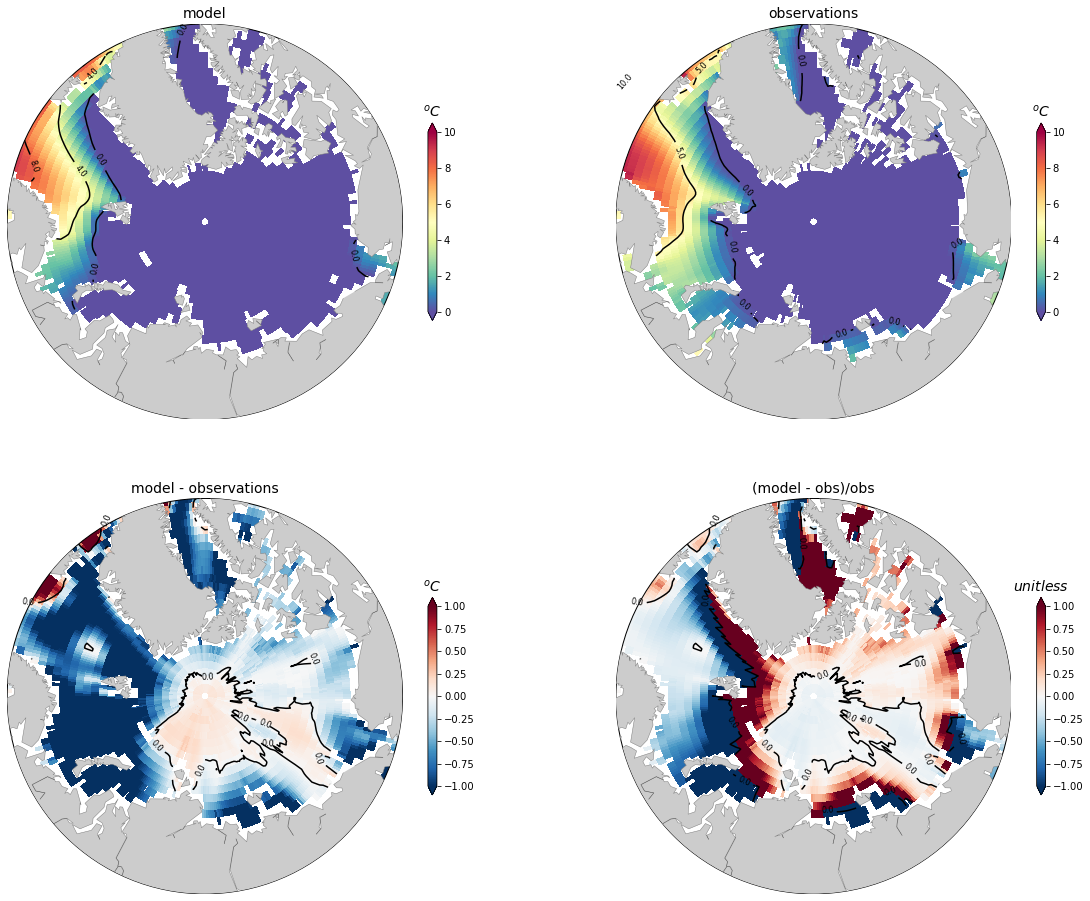

In [17]:
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Model
ax = fig.add_subplot(221) 
ax.set_title("model", fontsize =14)
phyto, lon= add_cyclic_point(temp_surf_avg_model, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', vmin = 0, vmax = 10)
cs=m.contour(x, y, phyto, colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# Observations 
ax1 = fig.add_subplot(222) 
ax1.set_title("observations", fontsize =14)
phyto, lon= add_cyclic_point(temp_surf_avg_obs, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', vmin = 0, vmax = 10)
cs=m.contour(x, y, phyto, colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# model - observations 
ax2 = fig.add_subplot(223) 
ax2.set_title("model - observations", fontsize =14)
phyto, lon= add_cyclic_point(temp_diff, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -1, vmax = 1)
cs=m.contour(x, y, phyto, levels =[0],colors='k', vmin =0, vmax=1)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$^oC$', fontsize = 14)

# model - observations / observations  
ax3 = fig.add_subplot(224) 
ax3.set_title("(model - obs)/obs", fontsize =14)
phyto, lon= add_cyclic_point(temp_diff_norm, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -1, vmax = 1)
cs=m.contour(x, y, phyto, levels =[0], colors='k', vmin =0, vmax=1)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$unitless$', fontsize = 14)

m.plot
plt.show()

fig.savefig('temp_ao_comparison.png', dpi=600, bbox_inches='tight')

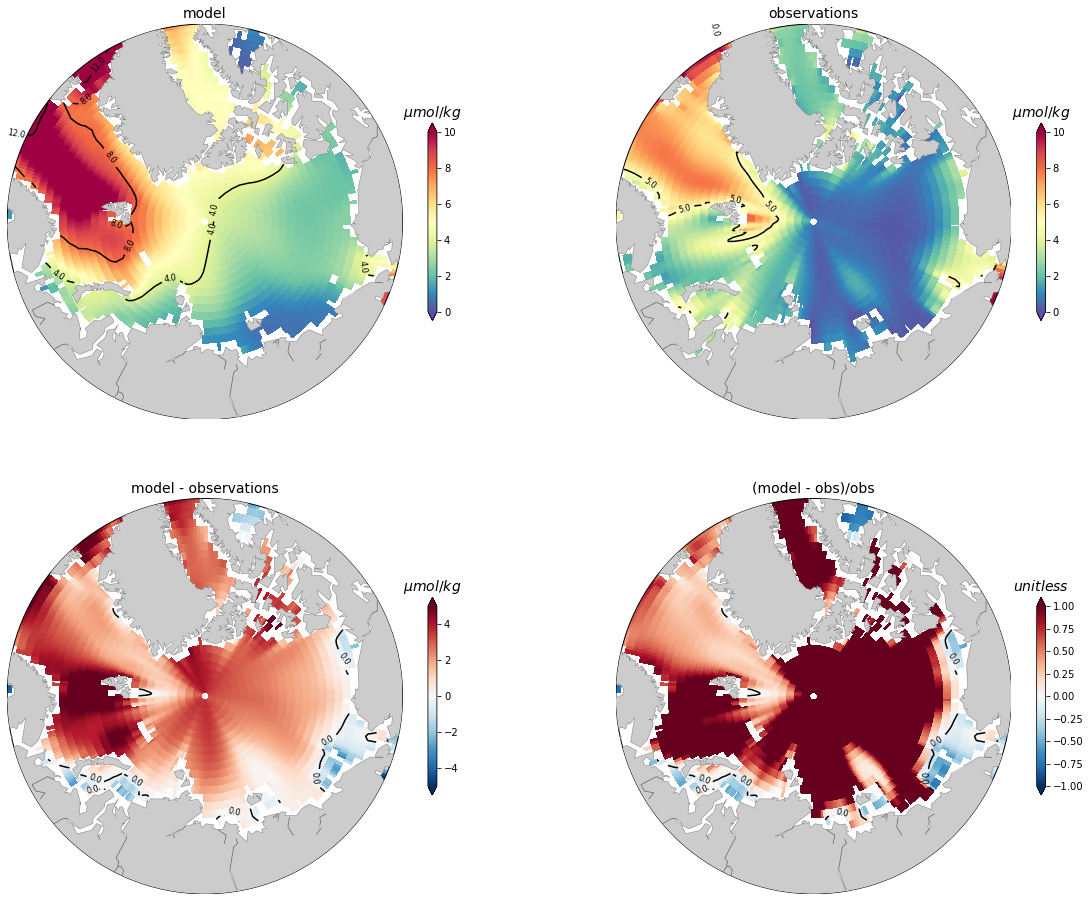

In [18]:
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
x, y = m(*np.meshgrid(ds.lon,ds.lat))

# Model
ax = fig.add_subplot(221) 
ax.set_title("model", fontsize =14)
phyto, lon= add_cyclic_point(no3_surf_avg_model, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', vmin = 0, vmax = 10)
cs=m.contour(x, y, phyto, colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# Observations 
ax1 = fig.add_subplot(222) 
ax1.set_title("observations", fontsize =14)
phyto, lon= add_cyclic_point(no3_surf_avg_obs, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', vmin = 0, vmax = 10)
cs=m.contour(x, y, phyto, colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations 
ax2 = fig.add_subplot(223) 
ax2.set_title("model - observations", fontsize =14)
phyto, lon= add_cyclic_point(no3_diff, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -5, vmax = 5)
cs=m.contour(x, y, phyto, levels =[0],colors='k', vmax=0)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations / observations  
ax3 = fig.add_subplot(224) 
ax3.set_title("(model - obs)/obs", fontsize =14)
phyto, lon= add_cyclic_point(no3_diff_norm, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -1, vmax = 1)
cs=m.contour(x, y, phyto, colors='k', vmin =0, vmax=1)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$unitless$', fontsize = 14)

m.plot
plt.show()
fig.savefig('no3_ao_comparison.png', dpi=600, bbox_inches='tight')

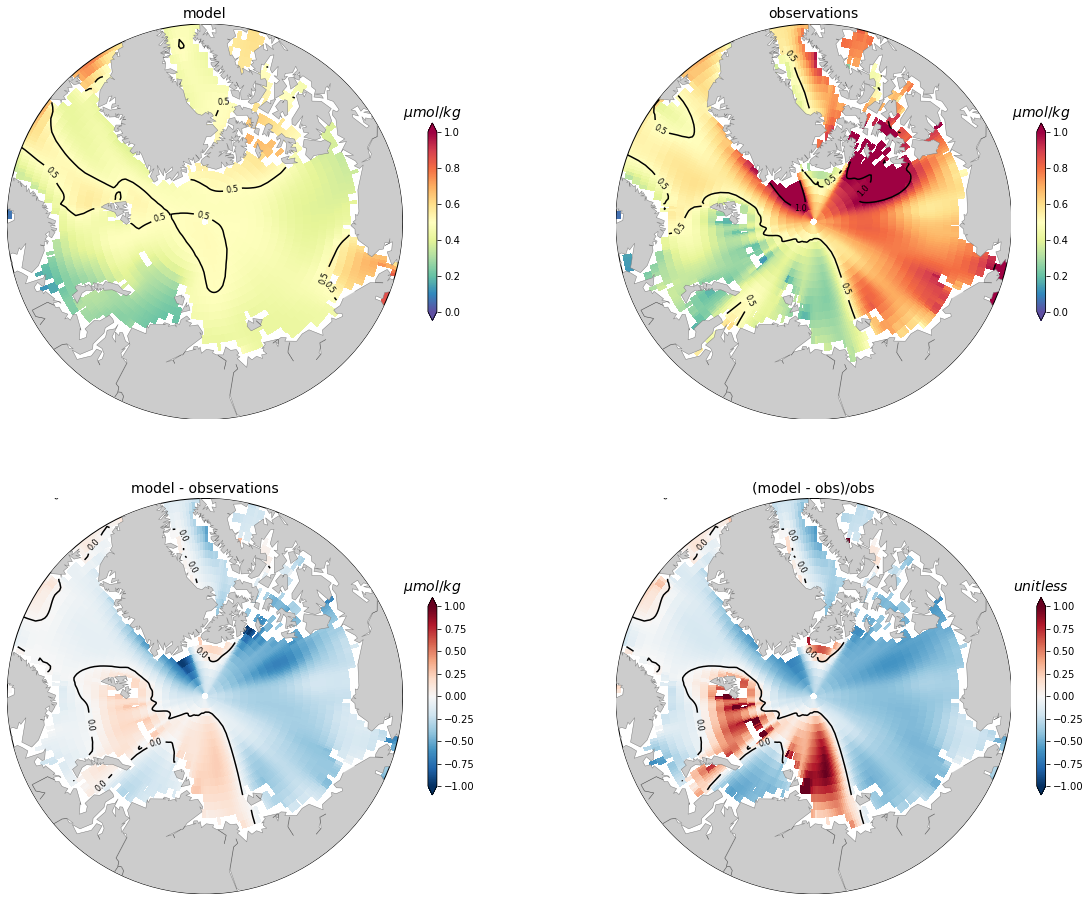

In [15]:
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='npstere',round=True, boundinglat=65, lon_0=180+(-100+-30)/2.,resolution='c')
#x, y = m(*np.meshgrid(ds.lon,ds.lat))
lat = ds.lat
# Model
ax = fig.add_subplot(221) 
ax.set_title("model", fontsize =14)
phyto, lon= add_cyclic_point(po4_surf_avg_model, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', vmin = 0, vmax = 1)
cs=m.contour(x, y, phyto,levels = [0,0.5,1], colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# Observations 
ax1 = fig.add_subplot(222) 
ax1.set_title("observations", fontsize =14)
phyto, lon= add_cyclic_point(po4_surf_avg_obs, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='Spectral_r', vmin = 0, vmax = 1)
cs=m.contour(x, y, phyto, levels = [0,0.5,1],colors='k')
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations 
ax2 = fig.add_subplot(223) 
ax2.set_title("model - observations", fontsize =14)
phyto, lon= add_cyclic_point(po4_diff, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -1, vmax = 1)
cs=m.contour(x, y, phyto, levels =[0],colors='k', vmin =0, vmax=1)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$\mu mol/kg$', fontsize = 14)

# model - observations / observations  
ax3 = fig.add_subplot(224) 
ax3.set_title("(model - obs)/obs", fontsize =14)
phyto, lon= add_cyclic_point(po4_diff_norm, coord=ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ds.lat))
cf = m.pcolor(x,y,phyto,cmap='RdBu_r', vmin = -1, vmax = 1)
cs=m.contour(x, y, phyto, levels =[0],colors='k', vmin =0, vmax=1)
plt.clabel(cs, fontsize=8, inline=True, fmt='%r',inline_spacing=5);
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
cbar = plt.colorbar(cf, shrink=0.5,extend='both')
cbar.ax.set_title('$unitless$', fontsize = 14)

m.plot
plt.show()
fig.savefig('po4_ao_comparison.png', dpi=600, bbox_inches='tight')